In [10]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [11]:
def getPermutation(totalRange,numberElements):
    random_seed = 10312003
    rng = np.random.RandomState(random_seed)
    permutation = rng.permutation(totalRange)
    return permutation[:numberElements]

def onlineKmeans(X,k=3,b=30,maxiter=1000):
    centroids = X[getPermutation(len(X),k)]
    pointsPerClusters = np.zeros([k,1])
    for i in range(maxiter):
        M=X[getPermutation(len(X),b)]
        distances = pairwise_distances(M, centroids, metric='euclidean')
        nearestCenters = np.argmin(distances, axis=1)
        for iter, x in enumerate(M):
            centerIndex = nearestCenters[iter]
            pointsPerClusters[centerIndex] = pointsPerClusters[centerIndex] + 1
            eta = 1/pointsPerClusters[centerIndex]
            centroids[centerIndex] = (1 - eta)*centroids[centerIndex] + eta * x

    return centroids

In [12]:
from timeit import Timer
from functools import partial
from memory_profiler import memory_usage
import timeit
from sklearn.metrics.pairwise import pairwise_distances

def profile_memory_and_time(function, *args, **kwargs):
    #print "args is ",args
    start_time = timeit.default_timer()
    memory, return_val = memory_usage((function, (args), kwargs), max_usage=True, retval=True)
    elapsed = timeit.default_timer() - start_time
    return memory[0], elapsed,return_val

In [13]:
iris = load_iris()
X=iris.data
random_seed = 10312003
rng = np.random.RandomState(random_seed)
permutation = rng.permutation(len(X))
X = X[permutation]
ourMemory,ourTime,ourCentroids= profile_memory_and_time(onlineKmeans, X, k=3, b=33, maxiter=1000)
#print ourMemory,ourTime,ourCentroids

In [14]:
from sklearn.cluster import MiniBatchKMeans
minibatch=MiniBatchKMeans(n_clusters=3,max_iter=100,batch_size=33)
memory, time, rval = profile_memory_and_time(minibatch.fit,X)
#print memory, time, rval.cluster_centers_

<IPython.core.display.Javascript object>


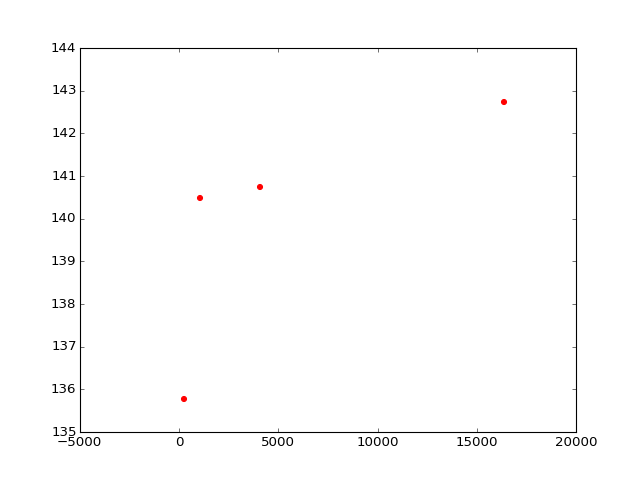

Running for 256 samples of dimension 32
Running for 1024 samples of dimension 32
Running for 4096 samples of dimension 32
Running for 16384 samples of dimension 32


In [19]:
inputSizesToGenerate = [[2**8, 32],[2**10, 32],[2**12, 32],[2**14, 32]]
                        #[2**16, 32],[2**18, 32],[2**20, 32],[2**22, 32]];
                        #[2**24, 32],[2**26, 32],[2**28, 32],[2**30, 32],[2**32, 32]];

scaler = StandardScaler()
plt.ion()
f1 = plt.figure()
ax1 = f1.add_subplot(111)

for num_samples, num_dimension in inputSizesToGenerate:
    print "Running for {0} samples of dimension {1}".format(num_samples, num_dimension)
    X,y = make_blobs(n_samples=num_samples, n_features=num_dimension, centers=6)
    #print "Mean before scaling :\n%s"%X.mean(axis=0)
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    #print "Mean after scaling :\n%s"%X_scaled.mean(axis=0)
    #print "Mean after scaling :\n%s"%X.mean(axis=0)
    # run onlinekmeans and scikitkmeans
    
    ourMemory,ourTime,ourCentroids= profile_memory_and_time(onlineKmeans, X, k=3, b=33, maxiter=1000)
    #print  ourMemory,ourTime,ourCentroids
    memory, time, rval = profile_memory_and_time(minibatch.fit,X)
    #print  memory, time, rval.cluster_centers_
    #plt.scatter(num_samples, ourMemory,color="green")
    plt.scatter(num_samples, memory,color="red")
    plt.show()
    plt.savefig('memory.png')

    
